In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import os
import re
import numpy as np
import pandas as pd


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

2024-07-07 09:38:01.655671: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-07 09:38:01.724240: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-07 09:38:01.806825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 09:38:01.886606: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 09:38:01.887136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-07 09:38:02.001078: I tensorflow/core/platform/cpu_feature_guard.cc:

In [8]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)


In [9]:
def embed(texts):
    return model(texts)

In [10]:
df = pd.read_csv("tmdb_movies_data.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [11]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [12]:
df = df[["original_title","genres","overview"]]

df = df.dropna()
df = df.reset_index()
df = df[["original_title","genres","overview"]]


In [13]:
df.head()

,original_title,genres,overview
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Twenty-two years after the events of Jurassic ...
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,An apocalyptic story set in the furthest reach...
2,Insurgent,Adventure|Science Fiction|Thriller,Beatrice Prior must confront her inner demons ...
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Thirty years after defeating the Galactic Empi...
4,Furious 7,Action|Crime|Thriller,Deckard Shaw seeks revenge against Dominic Tor...


In [14]:
import sys
sys.setrecursionlimit(100000)



In [15]:
titles = list(df["overview"][:10000])
titles[0]

'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.'

In [16]:
embeddings = embed(titles)
print("Embedding Shape: ", embeddings.shape)

Embedding Shape:  (10000, 512)


In [17]:
pca = PCA(n_components=2)
emb = pca.fit_transform(embeddings)

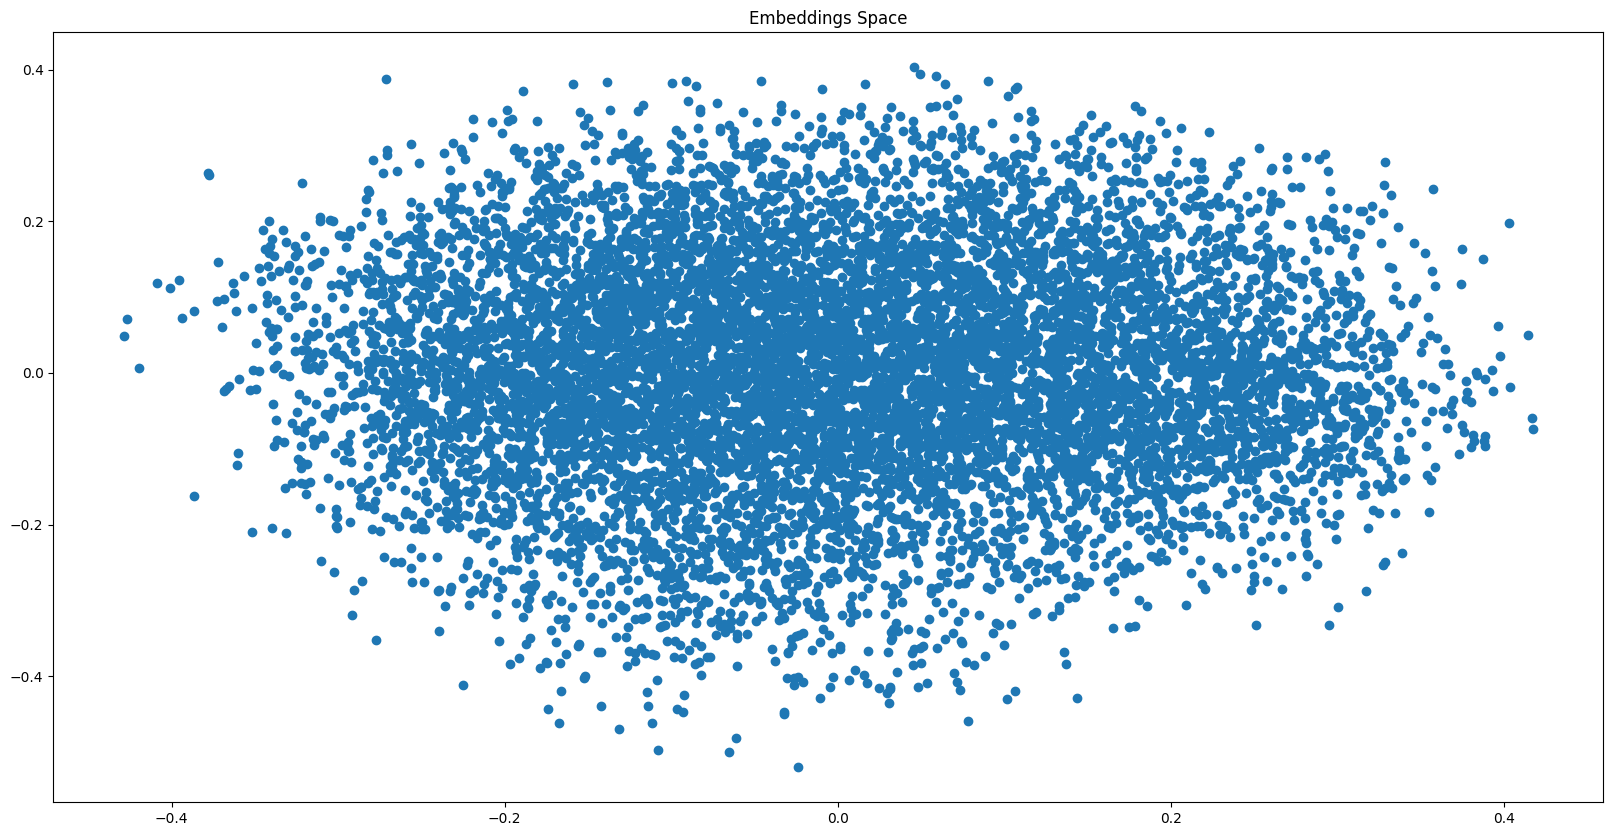

In [18]:
plt.figure(figsize=(20,10))
plt.title("Embeddings Space")
plt.scatter(emb[:,0], emb[:,1])
plt.show()

In [19]:
nn = NearestNeighbors(n_neighbors=20)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=20)

In [20]:
def recommend(text):
    embedded = embed([text])
    neighbors = nn.kneighbors(embedded, return_distance=False)[0]
    return df["original_title"].iloc[neighbors].tolist()

In [21]:
print("Recommended Movies")
recommend("Amelie")

Recommended Movies


['La Sconosciuta',
 'Girl, Interrupted',
 'Frequencies',
 'The Pretty One',
 'The Tourist',
 'Emma',
 'The Last Kiss',
 'French Kiss',
 'Carolina',
 'Silk',
 'Ho Voglia Di Te',
 'In Your Eyes',
 'Une vie meilleure',
 "Le conseguenze dell'amore",
 'If I Stay',
 'Citizenfour',
 'Lola Versus',
 'Emma',
 'Terms of Endearment',
 "The Pervert's Guide to Ideology"]